In [61]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

# Create SparkSession
use all allowed multi-core cpu on local

In [62]:
spark=SparkSession\
.builder\
.master('local[*]')\
.appName('spark_app')\
.getOrCreate()

In [63]:
spark

### Import csv

In [72]:
df = spark.read.csv('book_customer.csv', header=True, inferSchema=True)

# Data Profiling

In [73]:
df.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- user_id: string (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- price: double (nullable = true)



In [74]:
df.show(5)

+-------------------+--------+-------+------------+-----+
|          timestamp| user_id|book_id|     country|price|
+-------------------+--------+-------+------------+-----+
|2021-05-01 08:03:44|824dc295|      2|      Israel|24.95|
|2021-05-02 02:48:34|f80fe106|      6|    Thailand|31.49|
|2021-05-01 16:54:57|01cb9fe0|      9|       Italy|29.65|
|2021-05-01 21:45:28|59508f47|     13|South Africa| 22.4|
|2021-05-01 14:50:52|3553ebbb|     14|      Canada| 28.0|
+-------------------+--------+-------+------------+-----+
only showing top 5 rows



In [75]:
df.count()

500000

In [76]:
df.summary('count').show()

+-------+-------+-------+-------+------+
|summary|user_id|book_id|country| price|
+-------+-------+-------+-------+------+
|  count| 499998| 500000| 500000|500000|
+-------+-------+-------+-------+------+



There's `missing value` on user_id

In [77]:
df.dtypes

[('timestamp', 'timestamp'),
 ('user_id', 'string'),
 ('book_id', 'int'),
 ('country', 'string'),
 ('price', 'double')]

### Lazy Evaluation
In Spark, `Lazy Evaluation` means that You can apply as many TRANSFORMATIONs as you want, but Spark will **not start** the execution of the process <ins>until an ACTION is called.</ins>

In [79]:
df.where(df.user_id.isNull()) # Lazy Evaluation

DataFrame[timestamp: timestamp, user_id: string, book_id: int, country: string, price: double]

In [80]:
df.where(df.user_id.isNull()).show() # action

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20|   null|    516| Brazil|27.37|
|2021-06-30 02:27:00|   null|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+



In [84]:
df.describe().show()

+-------+--------+-----------------+-------+------------------+
|summary| user_id|          book_id|country|             price|
+-------+--------+-----------------+-------+------------------+
|  count|  499998|           500000| 500000|            500000|
|   mean|Infinity|       740.377786|   null|31.459311679998564|
| stddev|     NaN|559.9366172146358|   null|10.945931459891698|
|    min|00000f49|                1|Algeria|               0.0|
|    max|ffffe3e7|             2269|  Yemen|              84.0|
+-------+--------+-----------------+-------+------------------+



In [88]:
df.summary().show()

+-------+-----------+-----------------+-------+------------------+
|summary|    user_id|          book_id|country|             price|
+-------+-----------+-----------------+-------+------------------+
|  count|     499998|           500000| 500000|            500000|
|   mean|   Infinity|       740.377786|   null|31.459311679998564|
| stddev|        NaN|559.9366172146358|   null|10.945931459891698|
|    min|   00000f49|                1|Algeria|               0.0|
|    25%|2.4050123E7|              262|   null|             24.95|
|    50%|  7.04742E7|              614|   null|             29.99|
|    75%|   4.857E81|             1215|   null|             34.99|
|    max|   ffffe3e7|             2269|  Yemen|              84.0|
+-------+-----------+-----------------+-------+------------------+



In [91]:
df.select("price").summary().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|            500000|
|   mean|31.459311679998564|
| stddev|10.945931459891698|
|    min|               0.0|
|    25%|             24.95|
|    50%|             29.99|
|    75%|             34.99|
|    max|              84.0|
+-------+------------------+



In [92]:
df.where(df.user_id.isNull()).show()

+-------------------+-------+-------+-------+-----+
|          timestamp|user_id|book_id|country|price|
+-------------------+-------+-------+-------+-----+
|2021-05-01 14:41:20|   null|    516| Brazil|27.37|
|2021-06-30 02:27:00|   null|   1390|  Japan|27.99|
+-------------------+-------+-------+-------+-----+



# Exploratory Data Analysis (EDA)

### Non-graphic EDA

##### Numeric

In [104]:
df.where(df.price < 10).show()

+-------------------+--------+-------+--------------------+-----+
|          timestamp| user_id|book_id|             country|price|
+-------------------+--------+-------+--------------------+-----+
|2021-05-01 00:16:49|96e247bd|     89|United States of ...| 6.97|
|2021-05-01 02:24:23|17d254af|    265|United States of ...| 6.95|
|2021-05-01 08:05:36|15b062aa|    265|United States of ...| 6.95|
|2021-05-01 22:38:30|20cb45ac|    265|      United Kingdom| 6.95|
|2021-05-02 02:48:42|1aae53bd|    265|             Vietnam| 6.95|
|2021-05-01 15:09:13|228965c7|    756|      United Kingdom| 6.95|
|2021-05-01 04:40:23|93493e37|    858|              France|  0.0|
|2021-05-01 06:12:45|79c2705c|    858|             Austria|  0.0|
|2021-05-01 06:15:21|c819712a|    858|            Malaysia|  0.0|
|2021-05-01 11:23:05|9b519bdc|    858|United States of ...|  0.0|
|2021-05-01 17:47:59|677b49df|    858|              Brazil|  0.0|
|2021-05-01 00:27:02|575c22b3|   1056|          Montenegro| 6.95|
|2021-05-0

##### String

In [103]:
df.where(df.country == 'Thailand').show()

+-------------------+--------+-------+--------+-----+
|          timestamp| user_id|book_id| country|price|
+-------------------+--------+-------+--------+-----+
|2021-05-02 02:48:34|f80fe106|      6|Thailand|31.49|
|2021-05-01 02:48:58|405a6c88|     30|Thailand|14.95|
|2021-05-02 01:10:03|6e47e5bc|     36|Thailand|23.95|
|2021-05-01 16:27:41|b1171275|     46|Thailand|31.93|
|2021-05-01 02:48:35|03c9dd6b|     56|Thailand|24.95|
|2021-05-01 10:57:31|b95d1c98|     56|Thailand|24.95|
|2021-05-01 19:32:28|3bb90f4e|     73|Thailand|27.99|
|2021-05-01 05:27:39|e457a1a5|     85|Thailand|22.67|
|2021-05-02 03:35:23|2c7e6cfe|    203|Thailand| 31.5|
|2021-05-01 04:51:06|8c5f1416|    248|Thailand| 28.0|
|2021-05-01 21:51:31|780d1ed8|    248|Thailand| 28.0|
|2021-05-01 16:51:07|ab1acc54|    266|Thailand|19.59|
|2021-05-01 01:28:12|70fd4bda|    309|Thailand| 28.0|
|2021-05-02 02:24:21|ea03a9b1|    322|Thailand|30.79|
|2021-05-01 10:30:11|5367613d|    330|Thailand| 28.0|
|2021-05-01 14:41:49|5a41eb3

In [111]:
df.where((df.country == 'Thailand') & (df.price < 5)).show()

+-------------------+--------+-------+--------+-----+
|          timestamp| user_id|book_id| country|price|
+-------------------+--------+-------+--------+-----+
|2021-05-02 00:01:20|0c9aa94e|   2085|Thailand| 3.95|
|2021-05-02 12:21:02|b1bde527|   1973|Thailand| 2.27|
|2021-05-02 06:50:55|b189d045|   2103|Thailand| 4.89|
|2021-05-03 04:38:35|00e5e399|   2168|Thailand| 2.79|
|2021-05-08 08:29:54|ba6ab8d6|   1886|Thailand| 3.95|
|2021-05-09 08:50:00|d454f253|   1923|Thailand| 3.95|
|2021-05-10 00:16:56|5648c641|   2109|Thailand| 3.95|
|2021-05-10 20:51:22|c8ec044d|   1975|Thailand| 3.95|
|2021-05-13 17:22:34|d5124f6e|   2032|Thailand| 3.95|
|2021-05-15 00:04:00|47885dc9|   2201|Thailand| 3.95|
|2021-05-17 02:33:00|2bdbd4ee|   2016|Thailand|  0.0|
|2021-05-16 23:45:55|011e0ea0|   2088|Thailand| 3.95|
|2021-05-16 14:02:55|82c0ed6a|   2201|Thailand| 3.95|
|2021-05-18 11:27:30|f06684db|   2006|Thailand| 3.95|
|2021-05-20 21:44:40|a4a8b7ad|   1899|Thailand| 3.95|
|2021-05-20 01:55:02|ed3719d

find bought transaction on April and August

In [114]:
df.where(df.timestamp.startswith('2021-04')).show() # none

+---------+-------+-------+-------+-----+
|timestamp|user_id|book_id|country|price|
+---------+-------+-------+-------+-----+
+---------+-------+-------+-------+-----+



In [116]:
df.where(df.timestamp.startswith('2021-08')).count() # none

0

### Graphical EDA

Spark purpose isn't visualization so, using pandas + visualization lib instead by convert spark dataframe ==> to pandas dataframe

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [119]:
df_pd = df.toPandas()

TypeError: Casting to unit-less dtype 'datetime64' is not supported. Pass e.g. 'datetime64[ns]' instead.

fixed: [stackoverflow](https://stackoverflow.com/questions/76072664/convert-pyspark-dataframe-to-pandas-dataframe-fails-on-timestamp-column)

In [120]:
df_pd = df.withColumn("timestamp", date_format("timestamp", "yyyy-MM-dd HH:mm:ss")).toPandas()

In [121]:
df_pd.head()

,timestamp,user_id,book_id,country,price
0,2021-05-01 08:03:44,824dc295,2,Israel,24.95
1,2021-05-02 02:48:34,f80fe106,6,Thailand,31.49
2,2021-05-01 16:54:57,01cb9fe0,9,Italy,29.65
3,2021-05-01 21:45:28,59508f47,13,South Africa,22.40
4,2021-05-01 14:50:52,3553ebbb,14,Canada,28.00


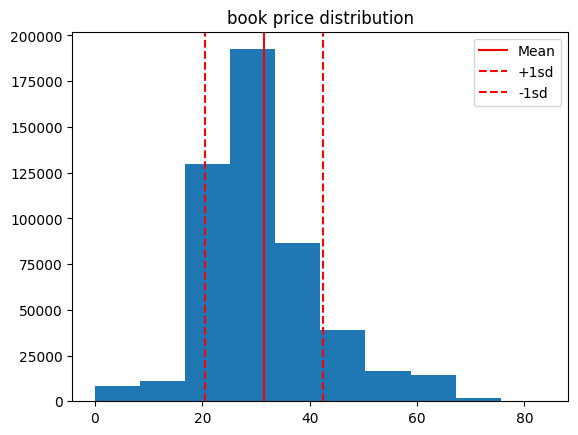

In [158]:
u, sg = df_pd.price.mean(), df_pd.price.std() 
df_pd.price.hist(bins=10)
plt.title('book price distribution')
plt.axvline(u, c='red', label='Mean')
plt.axvline(u + sg, c='red', linestyle='--', label='+1sd')
plt.axvline(u - sg, c='red', linestyle='--', label='-1sd')
plt.legend()
plt.grid(None)

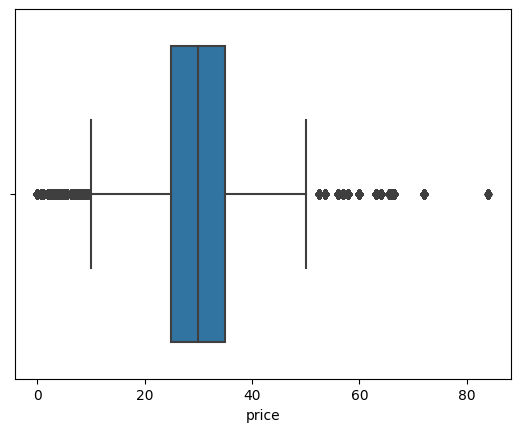

In [125]:
sns.boxplot(data=df_pd, x='price');

just showing plot correlation (because limit feature so i use user_id and price [ correlation doesn't implt causation ]

In [ ]:
sns.scatterplot(
    data=df_pd,
    x='user_id',
    y='price'
)